# First Name: 
# Last Name: 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
nesarc = pd.read_csv('nesarc.csv', low_memory=False)
pd.set_option('display.float_format', lambda x:'%f'%x)

In [3]:
nesarc['S3AQ3B1'] = pd.to_numeric(nesarc['S3AQ3B1'], errors='coerce') #convert variable to numeric
nesarc['S3AQ3C1'] = pd.to_numeric(nesarc['S3AQ3C1'], errors='coerce') #convert variable to numeric
nesarc['CHECK321'] = pd.to_numeric(nesarc['CHECK321'], errors='coerce') #convert variable to numeric
nesarc['TAB12MDX'] = pd.to_numeric(nesarc['TAB12MDX'], errors='coerce') #convert variable to numeric
nesarc['AGE'] = pd.to_numeric(nesarc['AGE'], errors='coerce') #convert variable to numeric

In [4]:
sub1=nesarc[(nesarc['AGE']>=18) & (nesarc['AGE']<=25) & (nesarc['CHECK321']==1)]
sub2=sub1.copy()

In [5]:
#SETTING MISSING DATA
sub2['S3AQ3B1']=sub2['S3AQ3B1'].replace(9, np.nan)
sub2['S3AQ3C1']=sub2['S3AQ3C1'].replace(99, np.nan)

In [6]:
recode2 = {1: 30, 2: 22, 3: 14, 4: 5, 5: 2.5, 6: 1}
sub2['USFREQMO']= sub2['S3AQ3B1'].map(recode2)

In [7]:
sub2['USFREQMO'].head()

20    30.000000
76    22.000000
102   30.000000
121   30.000000
135   30.000000
Name: USFREQMO, dtype: float64

# Line chart

In [8]:
# A secondary variable multiplying the number of days smoked/month and the approx number of cig smoked/day
sub2['NUMCIGMO_EST']=sub2['USFREQMO'] * sub2['S3AQ3C1']

In [9]:
var = sub2.groupby(['AGE']).NUMCIGMO_EST.mean()
print(var)

AGE
18   333.891304
19   294.545226
20   340.662844
21   312.610879
22   306.251101
23   302.939130
24   344.767782
25   329.415761
Name: NUMCIGMO_EST, dtype: float64


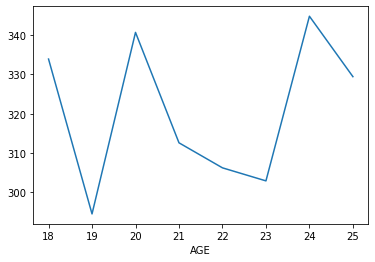

In [10]:
%matplotlib inline 
`

In [11]:
var2 = sub2.groupby(['AGE']).NUMCIGMO_EST.sum()
print(var2)

AGE
18   53756.500000
19   58614.500000
20   74264.500000
21   74714.000000
22   69519.000000
23   69676.000000
24   82399.500000
25   60612.500000
Name: NUMCIGMO_EST, dtype: float64


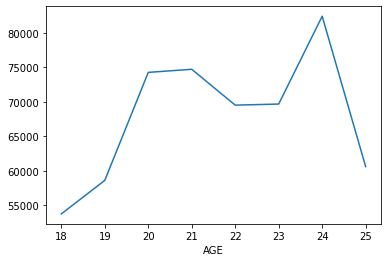

In [12]:
fig = plt.figure()
var2.plot(kind='line')

# Stacked Column Chart

In [13]:
var3 = sub2.groupby(['AGE','TAB12MDX']).NUMCIGMO_EST.sum()
print(var3)

AGE  TAB12MDX
18   0          16398.500000
     1          37358.000000
19   0          19663.000000
     1          38951.500000
20   0          21370.500000
     1          52894.000000
21   0          31345.500000
     1          43368.500000
22   0          22204.500000
     1          47314.500000
23   0          28209.000000
     1          41467.000000
24   0          31694.500000
     1          50705.000000
25   0          15961.000000
     1          44651.500000
Name: NUMCIGMO_EST, dtype: float64


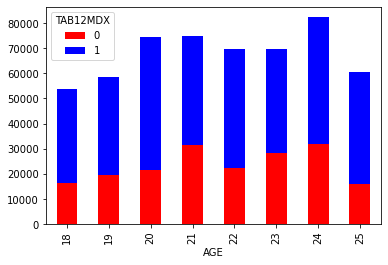

In [14]:
var3.unstack().plot(kind='bar', stacked=True,  color=['red','blue'], grid=False)

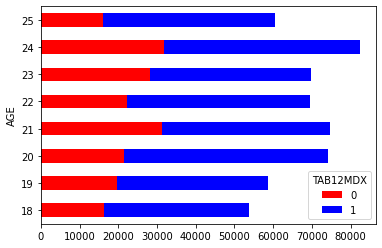

In [15]:
var3.unstack().plot(kind='barh', stacked=True,  color=['red','blue'], grid=False)

In [16]:
print(var2)

AGE
18   53756.500000
19   58614.500000
20   74264.500000
21   74714.000000
22   69519.000000
23   69676.000000
24   82399.500000
25   60612.500000
Name: NUMCIGMO_EST, dtype: float64


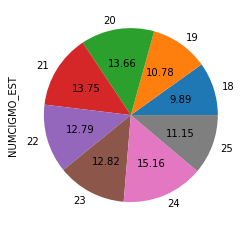

In [17]:
fig = plt.figure()
var2.plot(kind='pie',autopct='%.2f')

# Violin Plot

In [18]:
sub2['S1Q10A'] = pd.to_numeric(nesarc['S1Q10A']) #convert variable to numeric
sub2['S1Q10A'].head(10)

20     15000
76      3000
102    13000
121    27000
135     7000
149     1600
154     7000
173    12000
177    10000
183      600
Name: S1Q10A, dtype: int64

Text(0, 0.5, 'Income')

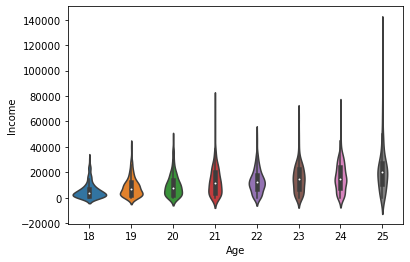

In [19]:
fig = plt.figure()
sns.violinplot(x='AGE', y='S1Q10A', data=sub2)
plt.xlabel('Age')
plt.ylabel('Income')

# HeatMap

In [20]:
# you can rename categorical variable values for graphing if original values are not informative 
# first change the variable format to categorical if you haven’t already done so
sub2['ETHRACE2A'] = sub2['ETHRACE2A'].astype('category')
# second create a new variable (PACKCAT) that has the new variable value labels
sub2['ETHRACE2A']=sub2['ETHRACE2A'].cat.rename_categories(["White", "Black", "NatAm", "Asian", "Hispanic"])

In [21]:
def PACK_ADAY (row):
   if row['USFREQMO'] >= 30 :
      return 1
   elif row['USFREQMO'] < 30 :
      return 0
      
sub2['PACK_ADAY'] = sub2.apply (lambda row: PACK_ADAY (row),axis=1)
      
c4= sub2.groupby('PACK_ADAY').size()
print(c4)

PACK_ADAY
0.000000     383
1.000000    1320
dtype: int64


C:\Users\jc790999\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(6.799999999999997, 0.5, 'Proportion of smoke a pack day Smokers')

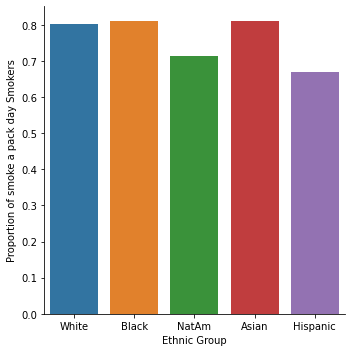

In [22]:
# bivariate bar graph C->C
%matplotlib inline
sns.factorplot(x='ETHRACE2A', y='PACK_ADAY', data=sub2, kind="bar", ci=None)
plt.xlabel('Ethnic Group')
plt.ylabel('Proportion of smoke a pack day Smokers')

In [23]:
sub3 = sub2[['ETHRACE2A','PACK_ADAY']].copy()
sub3.head()

,ETHRACE2A,PACK_ADAY
20,Black,1.000000
76,Hispanic,0.000000
102,White,1.000000
121,White,1.000000
135,White,1.000000


In [24]:
table = pd.pivot_table(sub3, index=['ETHRACE2A'], columns=['PACK_ADAY'], aggfunc=np.size)
print(table)

PACK_ADAY  0.000000  1.000000
ETHRACE2A                    
White           418      1698
Black            80       340
NatAm            24        60
Asian            22        94
Hispanic        222       448


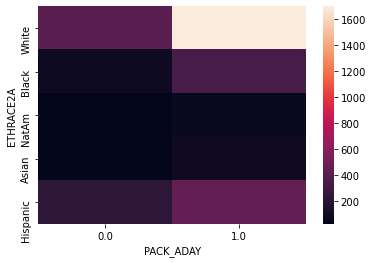

In [25]:
fig = plt.figure()
sns.heatmap(table)

# Bubble Chart

In [26]:
pd.set_option('display.float_format', lambda x:'%.2f'%x)

gapminder = pd.read_csv('gapminder.csv', low_memory=False)
gapminder.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,,.03,.5696534,26.8,75944000,25.6000003814697,,3.65412162280064,48.673,,0,,6.68438529968262,55.7000007629394,24.04
1,Albania,1914.99655094922,7.29,1.0247361,57.4,223747333.333333,42.0999984741211,,44.9899469578783,76.918,,9,636.341383366604,7.69932985305786,51.4000015258789,46.72
2,Algeria,2231.99333515006,.69,2.306817,23.5,2932108666.66667,31.7000007629394,.1,12.5000733055148,73.131,.42009452521537,2,590.509814347428,4.8487696647644,50.5,65.22
3,Andorra,21943.3398976022,10.17,,,,,,81,,,,,5.36217880249023,,88.92
4,Angola,1381.00426770244,5.57,1.4613288,23.1,248358000,69.4000015258789,2,9.99995388324075,51.093,,-2,172.999227388199,14.5546770095825,75.6999969482422,56.7


In [27]:
gapminder['internetuserate'] = pd.to_numeric(gapminder['internetuserate'],errors='coerce')
gapminder['urbanrate'] = pd.to_numeric(gapminder['urbanrate'],errors='coerce')
gapminder['incomeperperson'] = pd.to_numeric(gapminder['incomeperperson'],errors='coerce')

In [28]:
gapminder_clean=gapminder.dropna()

Text(0, 0.5, 'Income Per Person')

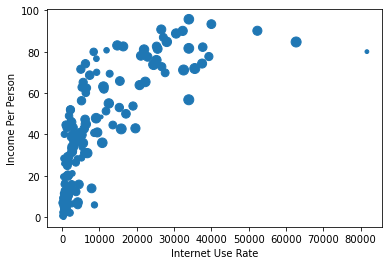

In [29]:
# x = internetuserate
# y = incomeperperson
# Added third variable income as size of the bubble
%matplotlib inline
fig = plt.figure()
plt.scatter(gapminder_clean['incomeperperson'],gapminder_clean['internetuserate'], s=gapminder_clean['urbanrate']) 
plt.xlabel('Internet Use Rate')
plt.ylabel('Income Per Person')